# Doing basic and advanced math with `mpmath`

## What is it?

`Mpmath` is a Python library for **arbitrary-precision floating-point arithmetic**. For general information about `mpmath`, see the [project website](http://mpmath.org/).

On top of its support for arbitrary-precision arithmetic, `mpmath` provides extensive support for transcendental functions, evaluation of sums, integrals, limits, roots, and so on. It also does many standard mathematical tasks like,

- Polynomials
- Root-finding and optimization
- Sums, products, limits and extrapolation
- Differentiation
- Numerical integration (quadrature)
- Ordinary differential equations
- Function approximation
- Numerical inverse Laplace transform

In [1]:
from math import sqrt
print(sqrt(2))

1.4142135623730951


In [5]:
import numpy as np
print(np.sqrt(2))

1.4142135623730951


In [7]:
print(np.sqrt(2, dtype=np.float32))

1.4142135


In [8]:
import mpmath.libmp
mpmath.libmp.BACKEND

'gmpy'

In [13]:
import mpmath as mp
from mpmath import *

## Setting precision to 10 decimal places

In [14]:
mp.dps=10

In [15]:
print("Sqrt of 2 (10 decimal places): ",mpf(2) ** mpf('0.5'))
print("Twice of pi (10 decimal places)", 2*pi)

Sqrt of 2 (10 decimal places):  1.414213562
Twice of pi (10 decimal places) 6.283185307


## Setting precision to 25 decimal places

In [16]:
mp.dps=25

In [17]:
print("Sqrt of 2 (10 decimal places): ",mpf(2) ** mpf('0.5'))
print("Twice of pi (10 decimal places)", 2*pi)

Sqrt of 2 (10 decimal places):  1.414213562373095048801689
Twice of pi (10 decimal places) 6.283185307179586476925287


## The `mp` context shows the current settings

In [10]:
print(mp)

Mpmath settings:
  mp.prec = 86                [default: 53]
  mp.dps = 25                 [default: 15]
  mp.trap_complex = False     [default: False]


## Use `mpf` instances instead of regular float
An mpf instance holds a real-valued floating-point number. They work analogously to Python floats, but support arbitrary-precision arithmetic.

In [18]:
mpf(12.3)

mpf('12.30000000000000071054273576')

In [19]:
mpf('12.3')

mpf('12.29999999999999999999999996')

In [20]:
mp.pretty = True

In [24]:
x=mpf('12.3')
print(x)

12.3


## The accuracy is not lost

In [25]:
x**mpf(0.5)

3.507135583350036383363493

## Normal Python calculation gives less precision

In [26]:
12.3**0.5

3.5071355833500366

## Factorial speed

In [34]:
%%timeit -n10 -r100
fac(10**5)

15.9 µs ± 2.79 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [32]:
from math import factorial

In [29]:
%%timeit -n10 -r100
factorial(10**5)

170 ms ± 11.7 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [36]:
f_mpmath = fac(10**5)
f_python = factorial(10**5)
print(f_mpmath)
print(float(f_python))

2.824229407960347874293422e+456573


OverflowError: int too large to convert to float

## Rational and complex numbers are treated in a native manner

In [37]:
mpmathify('3/4')

0.75

In [40]:
mpmathify('3/4') + mpmathify('2/7')

1.035714285714285714285714

In [38]:
mpmathify('2+3j')

(2.0 + 3.0j)

In [39]:
mpmathify('2+3j')**(mpf('0.5'))

(1.674149228035540040448039 + 0.8959774761298381247157338j)

In [41]:
import numpy as np

In [51]:
A = np.random.normal(size=100)
B = np.random.normal(size=100)

In [52]:
%%timeit -n10 -r100
A.dot(B)

The slowest run took 96.61 times longer than the fastest. This could mean that an intermediate result is being cached.
2.01 µs ± 6.12 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


In [53]:
%%timeit -n10 -r100
fdot(A,B)

443 µs ± 159 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)


## Plot

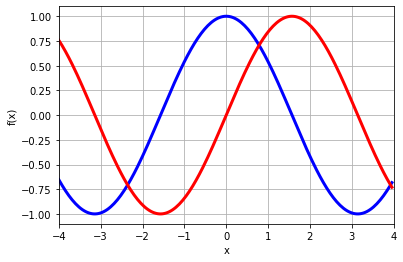

In [54]:
plot([cos, sin], [-4, 4])

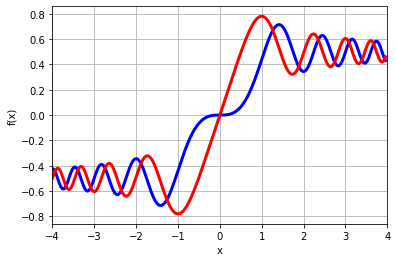

In [55]:
plot([fresnels, fresnelc], [-4, 4])

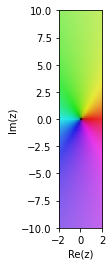

In [56]:
cplot(lambda z: z, [-2, 2], [-10, 10])

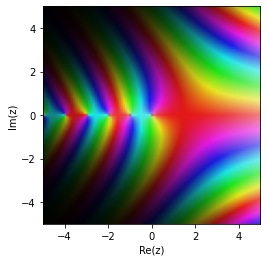

In [58]:
cplot(gamma, points=10000)

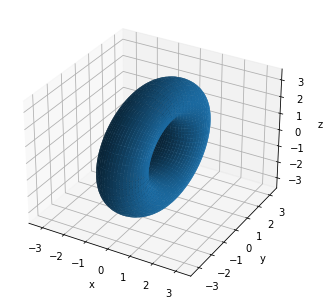

In [88]:
r, R = 1, 2.5
f = lambda u, v: [r*cos(u), (R+r*sin(u))*cos(v), (R+r*sin(u))*sin(v)]
splot(f, [0, float(2*pi)], [0, float(2*pi)],points=200,dpi=120)

## n-th root

In [94]:
for r in [root(3+4j, 7, k) for k in range(7)]:
    print("{}".format(r))

(1.247472705895526221523927 + 0.1662271241773525444423184j)
(0.6478249113010029918267916 + 1.078954351705588446708222j)
(-0.4396482547230982620878282 + 1.179206945741718717440614j)
(-1.196057317750688078827009 + 0.3914926581963046418346134j)
(-1.051810825389031340038652 - 0.691023585965792972199872j)
(-0.1155293284786681638014006 - 1.253184975583352195227716j)
(0.9077481091449566314041713 - 0.8716725182718191829981798j)


In [119]:
%%timeit -n5 -r20
for n in range(25,35):
    [binomial(mpf('50'),mpf(str(k))) for k in range(n+1)]

13.4 ms ± 3.11 ms per loop (mean ± std. dev. of 20 runs, 5 loops each)


In [99]:
import scipy.special

In [126]:
binomial(10**20, 10**20-5)

8.3333333333333333325e+97

## `Scipy` cannot do calculation with these large arguments

In [128]:
scipy.special.binom(int(10**20), int(10**20-5))

TypeError: ufunc 'binom' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [129]:
binomial(2.5,1.2)

2.585287397240184524055334

In [133]:
binomial(mpf('-12/5'),mpf('2/3'))

-0.4150035108034928041587776

In [132]:
scipy.special.binom(-2.4,0.667)

-0.417154501641134

## Hyperfactorial

### Using `mpmath`

In [146]:
%%timeit -n5 -r20
hyperfac(200)

341 µs ± 135 µs per loop (mean ± std. dev. of 20 runs, 5 loops each)


### Using pure Python

In [147]:
%%timeit -n5 -r20
prod=1
for n in range(1,201):
    prod*=n**n

11.5 ms ± 827 µs per loop (mean ± std. dev. of 20 runs, 5 loops each)


### How big is this number?

In [148]:
hyperfac(200)

1.142560024245405712989778e+41908

In [174]:
mp.dps=25

## Fibonacci numbers

In [175]:
fib(20)

6765.0

In [176]:
fib(20**5)

1.256941107429143065410115e+668760

In [172]:
fib(pi)

2.117027057916099911684598

In [173]:
fib(3+4j)

(-5248.511307283720182781954 - 14195.96228835301088580928j)

## Polynomial evaluation

$$\left( {3x^7+-2x^5+5x^4-3} \right)_{x=0.27}=-2.97598\cdots$$

In [182]:
polyval([3, 0, -2, 5, 0, 0, 0,-3], 0.27)

-2.975983920803909993806701

## Polynomial root

$$3x^7+-2x^5+5x^4=3$$

In [181]:
polyroots([3, 0, -2, 5, 0, 0, 0,-3])

[-1.295821155626593414551295,
 -0.8973346781104871960058213,
 0.8700356165162543117430376,
 (-0.1021871544563401270795588 - 0.8141076161287989904493385j),
 (-0.1021871544563401270795588 + 0.8141076161287989904493385j),
 (0.7637472630667532764865984 - 0.9407317375480711196626355j),
 (0.7637472630667532764865984 + 0.9407317375480711196626355j)]

## Root-finding

In [202]:
def func1(x):
    return exp(-0.1*x)*sin(x**2)

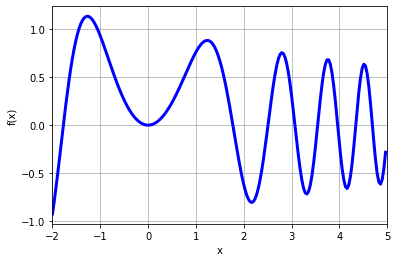

In [207]:
plot(func1,[-2,5])

In [209]:
for x0 in range(-2,6):
    r = findroot(func1,x0=x0,tol=1e-10,solver="newton")
    print(f"Solution near {x0}: {r}")

Solution near -2: -1.772453850905516027298168
Solution near -1: -0.0000005430976634644979218348307
Solution near 0: 0.0
Solution near 1: 0.0000002920122051525101216309755
Solution near 2: 1.772453850905516027298167
Solution near 3: 3.069980123839465465438655
Solution near 4: 3.963327297606011013345029
Solution near 5: 5.01325654926200100483153


## Numerical calculus

### Differentiation of any order

$$\left.\frac{d}{dx}\left( {x^2+x}\right ) \right\vert_{x=1.0}=3.0$$
$$\left.\frac{d^2}{dx^2}\left( {x^2+x}\right ) \right\vert_{x=1.0}=2.0$$
$$\left.\frac{d^3}{dx^3}\left( {x^2+x}\right ) \right\vert_{x=1.0}=0.0$$

In [210]:
print(diff(lambda x: x**2 + x, 1.0))
print(diff(lambda x: x**2 + x, 1.0, 2))
print(diff(lambda x: x**2 + x, 1.0, 3))

3.0
2.0
0.0


### Partial derivative

$$\left.\frac{\partial}{\partial x \partial y} \left( 3xy+2y-x \right) \right\vert_{x=0.25,y=0.5}$$

In [211]:
diff(lambda x,y: 3*x*y + 2*y - x, (0.25, 0.5), (0,1))

2.75

### 1-D integrals

$\int_{0}^{\infty}\frac{1}{1+x^2}=\frac{\pi}{2}$

$\int_{-\infty}^{\infty}\text{exp}(-x^2)=\sqrt{\pi}$

In [217]:
mp.dps=50

In [218]:
quad(lambda x: 1/(x**2+1), [0, inf])

1.5707963267948966192313216916397514420985846996876

In [219]:
quad(lambda x: exp(-x**2), [-inf, inf])

1.7724538509055160272981674833411451827975494561224

### 2-D integrals

$\int_{0}^{1}\int_{0}^{1}\frac{x-1}{(1-xy).\text{log}(xy)}$

In [221]:
mp.dps = 30
f = lambda x, y: (x-1)/((1-x*y)*log(x*y))
quad(f, [0, 1], [0, 1])

0.577215664901532860606512090082

## Ordinary differential equation

$y'(x)=y(x), y(0)=1$ 

$\rightarrow y(x)=\text{exp}(x)$

In [224]:
f = odefun(lambda x, y: y, 0, 1)

In [225]:
f(0.0)

1.0

In [226]:
f(1)

2.71828182845904523536028747135

$y'(x)=y(x), y(0)=\pi/2$ 

$\rightarrow y(x)=2\text{tan}^{-1}\text{exp}(x^2/2)$

In [227]:
f = odefun(lambda x, y: x*sin(y), 0, pi/2)

In [228]:
f(1)

2.0511774059286260678362079816